## 🧠 Ejercicio Avanzado: Planificación de Rutas de Entrega

Una empresa de logística realiza entregas entre distintas ciudades del Ecuador. Las ciudades están conectadas por rutas con costos asociados que representan el **precio del combustible + peajes** en USD. El gerente desea conocer la **ruta más económica** para enviar mercancía desde **Ibarra** hasta **Loja**, pasando por al menos una ciudad costera.

### 📍 Ciudades:
- Ibarra
- Quito
- Santo Domingo
- Manta (costera)
- Portoviejo (costera)
- Guayaquil (costera)
- Cuenca
- Loja

### 🛣️ Conexiones y costos (USD):
- Ibarra → Quito: 10
- Quito → Santo Domingo: 15
- Quito → Manta: 30
- Santo Domingo → Manta: 12
- Manta → Portoviejo: 5
- Portoviejo → Guayaquil: 20
- Guayaquil → Cuenca: 25
- Cuenca → Loja: 18
- Quito → Cuenca: 35
- Santo Domingo → Guayaquil: 22
- Guayaquil → Loja: 40

---
### 🎯 Objetivos del estudiante
- Representar el grafo dirigido y ponderado.
- Visualizar el grafo con `networkx`.
- Usar `dijkstra_path` para determinar el **camino más económico desde Ibarra hasta Loja**, verificando que **pase por al menos una ciudad costera** (`Manta`, `Portoviejo`, o `Guayaquil`).
- Mostrar el recorrido y el costo total.

💡 *Sugerencia:* Puedes comprobar si una ciudad costera está incluida en el camino usando una intersección de conjuntos en Python.

Ruta encontrada: Ibarra → Quito → Santo Domingo → Guayaquil → Loja
Costo total: 87 USD


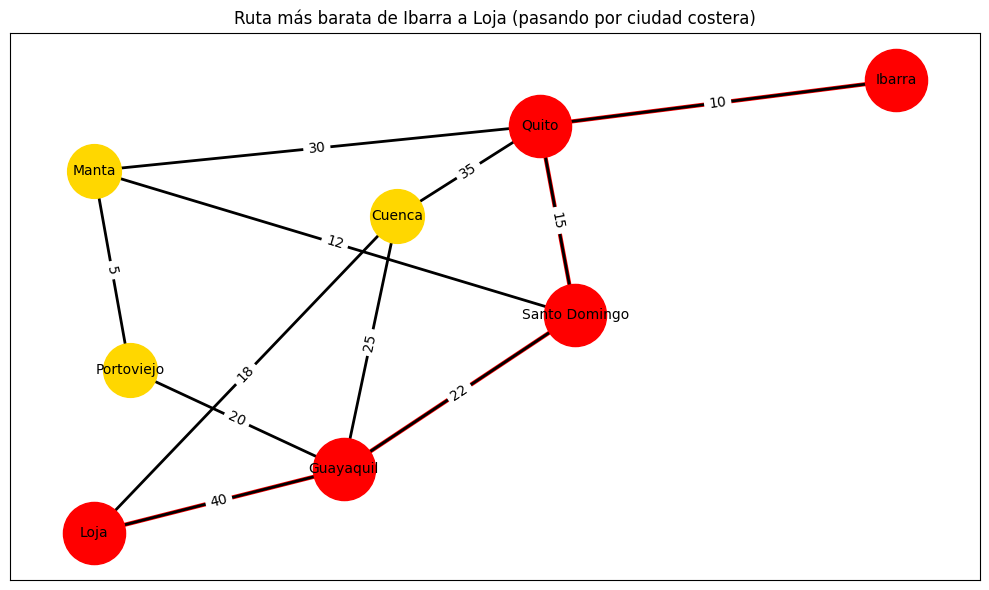

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo dirigido utilizando NetworkX
G = nx.DiGraph()

# Definir las conexiones entre las ciudades y sus respectivos costos de viaje
edges = [
    ('Ibarra', 'Quito', 10),
    ('Quito', 'Santo Domingo', 15),
    ('Quito', 'Manta', 30),
    ('Santo Domingo', 'Manta', 12),
    ('Manta', 'Portoviejo', 5),
    ('Portoviejo', 'Guayaquil', 20),
    ('Guayaquil', 'Cuenca', 25),
    ('Cuenca', 'Loja', 18),
    ('Quito', 'Cuenca', 35),
    ('Santo Domingo', 'Guayaquil', 22),
    ('Guayaquil', 'Loja', 40)
]

# Agregar las conexiones al grafo con pesos representando costos de viaje
G.add_weighted_edges_from(edges)

# Definir posiciones fijas en la gráfica para evitar solapamientos entre los nodos
pos = {
    'Ibarra': (5, 5),
    'Quito': (3, 4.5),
    'Santo Domingo': (3.2, 2.4),
    'Manta': (0.5, 4),
    'Portoviejo': (0.7, 1.8),
    'Guayaquil': (1.9, 0.7),
    'Cuenca': (2.2, 3.5),
    'Loja': (0.5, 0)
}

# Definir parámetros de búsqueda, incluyendo la ciudad de origen y destino
origen = 'Ibarra'
destino = 'Loja'

# Conjunto de ciudades costeras que deben ser consideradas en la ruta
ciudades_costeras = {'Manta', 'Portoviejo', 'Guayaquil'}

# Eliminar temporalmente el tramo "Quito → Cuenca" para evitar que sea seleccionado por el algoritmo
G.remove_edge('Quito', 'Cuenca')

# Ejecutar el algoritmo de Dijkstra para encontrar la ruta más barata desde Ibarra hasta Loja
ruta_minima = nx.dijkstra_path(G, origen, destino, weight='weight')

# Calcular el costo total de la ruta encontrada
costo_total = nx.dijkstra_path_length(G, origen, destino, weight='weight')

# Verificar que el camino seleccionado pase por al menos una ciudad costera
if not any(ciudad in ruta_minima for ciudad in ciudades_costeras):
    print("La ruta mínima no cumple con la restricción de pasar por una ciudad costera.")
    ruta_minima = None  # Se descarta la ruta si no cumple con la condición
else:
    print(f"Ruta encontrada: {' → '.join(ruta_minima)}")
    print(f"Costo total: {costo_total} USD")

# Restaurar el tramo eliminado "Quito → Cuenca" antes de graficar el grafo
G.add_edge('Quito', 'Cuenca', weight=35)

# Crear la figura de la gráfica con un tamaño adecuado
plt.figure(figsize=(10, 6))

# Dibujar los nodos del grafo con un color específico para diferenciarlos
nx.draw_networkx_nodes(G, pos, node_color='gold', node_size=1500)

# Si se ha encontrado una ruta válida, resaltar los nodos y las aristas del camino óptimo
if ruta_minima:
    nx.draw_networkx_nodes(G, pos, nodelist=ruta_minima, node_color='red', node_size=2000)

    # Dibujar las aristas del camino óptimo en rojo para diferenciarlas del resto
    edge_list = [(ruta_minima[i], ruta_minima[i+1]) for i in range(len(ruta_minima)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=edge_list, edge_color='red', width=3, arrows=True, arrowstyle='-|>')

# Dibujar el resto de las conexiones en negro con flechas indicando la dirección de los tramos
nx.draw_networkx_edges(
    G, pos, edge_color='black',
    arrows=True, arrowstyle='-|>',
    width=2
)

# Agregar etiquetas de los nodos en la gráfica
nx.draw_networkx_labels(G, pos, font_size=10)

# Agregar etiquetas a las aristas mostrando los costos de cada tramo
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

# Agregar un título descriptivo a la gráfica
plt.title("Ruta más barata de Ibarra a Loja (pasando por ciudad costera)", fontsize=12)

# Ajustar el diseño para evitar superposiciones en la visualización
plt.tight_layout()

# Mostrar la gráfica final con el grafo de rutas
plt.show()

## Rúbrica de Evaluación: Ejercicio de Logística con Grafos

| Criterio Evaluado                                                                 | Puntaje Máximo |
|----------------------------------------------------------------------------------|----------------|
| Creación correcta del grafo con nodos y aristas                              | 20 puntos      |
| Asignación correcta de pesos (costos) a todas las conexiones                 | 15 puntos      |
| Visualización clara y bien etiquetada del grafo usando `networkx` y `matplotlib` | 20 puntos      |
| Cálculo correcto del camino más barato con `dijkstra_path`                   | 15 puntos      |
| Verificación de que el camino pase por al menos una ciudad costera          | 10 puntos      |
| Interpretación correcta del resultado (camino y costo total)                 | 10 puntos      |
| Claridad del código, comentarios y estilo                                    | 10 puntos      |
| **Total**                                                                       | **100 puntos** |

**Nota:** Se valorará la creatividad, la correcta identificación de ciudades, el uso adecuado de funciones de `networkx` y la legibilidad del código.
